In [1]:
import pandas as pd
import numpy as np
from random import seed
from random import randint
import pandas as pd
import glob
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
import warnings

In [587]:

warnings.filterwarnings('ignore')

In [582]:
warnings.filterwarnings(action='once')

# Read data

In [2]:
root_dir = 'D:\\01 Machine Learning\\Bookie\\data'
data_list = ['D1', 'E0', 'F1', 'I1', 'SP1']
# '2009-2010' hdc is unreliable
season_list_19 = ['2005-2006', '2006-2007', '2007-2008', '2008-2009', '2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019']
season_list_20 = ['2019-2020']
season_list_all = season_list_19 + season_list_20
col_list_19 = ['Date', 'HomeTeam', 'AwayTeam', 'FTR', 'B365H', 'B365D', 'B365A', 'FTHG', 'FTAG', 'BbAHh', 'BbAvAHH', 'BbAvAHA']
col_list_20 = ['Date', 'HomeTeam', 'AwayTeam', 'FTR', 'B365H', 'B365D', 'B365A', 'FTHG', 'FTAG', 'AHCh', 'AvgCAHH', 'AvgCAHA']

season_date_begin = ['2005-07-01', '2006-07-01', '2007-07-01', '2008-07-01', '2010-07-01', '2011-07-01', '2012-07-01', '2013-07-01', '2014-07-01', '2015-07-01', '2016-07-01', '2017-07-01', '2018-07-01', '2019-07-01']
season_date_end   = ['2006-06-30', '2007-06-30', '2008-06-30', '2009-06-30', '2011-06-30', '2012-06-30', '2013-06-30', '2014-06-30', '2015-06-30', '2016-06-30', '2017-06-30', '2018-06-30', '2019-06-30', '2020-06-30']


df_19 = pd.DataFrame()
df_20 = pd.DataFrame()
for league in data_list:
    for season_19 in season_list_19:
        for data_19 in glob.glob('{}\\{}\\{}.csv'.format(root_dir, season_19, league)):
            df_19_tmp = pd.read_csv(data_19, index_col = 0, dayfirst=True, parse_dates = True, usecols = col_list_19)
            df_19_tmp['season'] = season_19
            df_19_tmp['league'] = league
            df_19 = df_19.append(df_19_tmp)
    for season_20 in season_list_20:
        for data_20 in glob.glob('{}\\{}\\{}.csv'.format(root_dir, season_20, league)):
            df_20_tmp = pd.read_csv(data_20, index_col = 0, dayfirst=True, parse_dates = True, usecols = col_list_20)
            df_20_tmp['season'] = season_20
            df_20_tmp['league'] = league
            df_20 = df_20.append(df_20_tmp)

df_20 = df_20.rename(columns={'AHCh' : 'BbAHh', 'AvgCAHH' : 'BbAvAHH', 'AvgCAHA' : 'BbAvAHA'})
           
df_all = df_19.append(df_20)            

#df_all = df_all.sort_values(by = ['league', 'Date'])

# for season in season_list:
#     for league in glob.glob('{}\\{}\\D1.csv'.format(root_dir, season)):
#         df_tmp = pd.read_csv(league, index_col = 0, parse_dates = True)
#         if not set(col_list).issubset(df_tmp.columns):
#             print('Check' + str(season))

In [ ]:
df_all.head()

In [ ]:
df_all.shape

In [ ]:
df_all['league'].value_counts()

In [ ]:
df_all['BbAHh'].where(df_all.BbAHh == 0).groupby(df_all.season).count()

In [ ]:
df_all['FTR'].where(df_all.FTR == 'H').groupby(df_all.season).count()/df_all['FTR'].groupby(df_all.season).count()

In [ ]:
df_all['FTR'].where(df_all.FTR == 'A').groupby(df_all.season).count()/df_all['FTR'].groupby(df_all.season).count()

In [ ]:
df_all['FTR'].where(df_all.FTR == 'D').groupby(df_all.season).count()/df_all['FTR'].groupby(df_all.season).count()

In [ ]:
df_all['FTR'].groupby(df_all.season).count()

## Home / Away

In [5]:
df_all.isna().sum()

HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
B365H       0
B365D       0
B365A       0
BbAHh       0
BbAvAHH     0
BbAvAHA     0
season      0
league      0
dtype: int64

In [4]:
df_all = df_all.dropna()

In [ ]:
df_all.shape

In [6]:
df_all['goal_diff'] = df_all.FTHG - df_all.FTAG + df_all.BbAHh

In [7]:
df_all['result_ha_hdc'] = np.NaN

In [8]:
df_all.loc[df_all['goal_diff'] > 0, 'result_ha_hdc'] = 1 # hdc home win
df_all.loc[df_all['goal_diff'] < 0, 'result_ha_hdc'] = 0 # hdc away win
df_all.loc[df_all['goal_diff'] == 0, 'result_ha_hdc'] = 2 # hdc draw

In [9]:
if df_all['result_ha_hdc'].value_counts().sum() == df_all['goal_diff'].count():
    print('Home/Away coding OK')

Home/Away coding OK


In [10]:
# 1: home win ; 0: away win, 2: draw
df_all['result_match'] = np.NaN
df_all['result_match'] = np.where( df_all['FTR'] == 'H', 1, np.where( df_all['FTR'] == 'A', 0, 2 ) )

In [ ]:
# df_all['result_ha_hdc'] = np.where(df_all.FTHG - df_all.FTAG + df_all.BbAHh > 0, 1, np.where(df_all.FTHG - df_all.FTAG + df_all.BbAHh < 0, 2, 3))

In [ ]:
df_all.head(10)

In [ ]:
df_all['result_ha_hdc'].value_counts()

In [ ]:
# Filter level
# df_all = df_all.loc[df_all.result_ha_hdc < 3]


In [ ]:
df_all['result_ha_hdc'].where((df_all.league == 'D1') & (df_all.BbAHh > 0)) .groupby([df_all.season]).value_counts()

In [ ]:
df_all['result_ha_hdc'].where((df_all.league == 'D1') & (df_all.BbAHh < 0)) .groupby([df_all.season]).value_counts()

In [ ]:
df_all['result_ha_hdc'].where((df_all.league == 'D1') & (df_all.BbAHh == 0)) .groupby([df_all.season]).value_counts()

## Up/Down

In [11]:
df_all['result_ud_hdc'] = np.NaN

In [12]:
# 1: up win; 2: down win
df_all['result_ud_hdc'] = np.where((df_all.BbAHh < 0) & (df_all.result_ha_hdc == 1), 1, np.where((df_all.BbAHh > 0) & (df_all.result_ha_hdc == 0), 1, 0))

In [13]:
df_all['result_ud_hdc'].value_counts()

0    15819
1     9190
Name: result_ud_hdc, dtype: int64

In [14]:
df_all.loc[df_all['BbAHh'] == 0, 'result_ud_hdc'] = np.NaN

In [15]:
df_all['result_ud_hdc'].value_counts()

0.0    11027
1.0     9190
Name: result_ud_hdc, dtype: int64

In [ ]:
# df_all = df_all.loc[df_all['BbAHh'] != 0]

In [ ]:
df_all['result_ud_hdc'].groupby(df_all.season).value_counts()

In [ ]:
df_all.head()

In [ ]:
ud_d = df_all['result_ud_hdc'].where(df_all.result_ud_hdc == 0).groupby([df_all.season, df_all.index.month, df_all.league]).count()

In [ ]:
ud_u = df_all['result_ud_hdc'].where(df_all.result_ud_hdc == 1).groupby([df_all.season, df_all.index.month, df_all.league]).count()

In [ ]:
ud_diff = ud_d - ud_u

In [ ]:
df_ud = pd.DataFrame({'ud_diff' : pd.Series(ud_diff)})

In [ ]:
df_ud = df_ud.unstack()

In [ ]:
df_ud.index.names = ['season','month']

In [ ]:
L = df_ud.columns.tolist()

In [ ]:
for i in range(len(L)):
    L[i] = data_list[i]

In [ ]:
df_ud.columns = L

In [ ]:
print('League: D1. Mean:', str(df_ud['D1'].mean()), ' ; std:', str(df_ud['D1'].std()))
df_ud['D1'].plot(figsize=(20,5),grid=True)

In [ ]:
print('League: E0. Mean:', str(df_ud['E0'].mean()), ' ; std:', str(df_ud['E0'].std()))
df_ud['E0'].plot(figsize=(20,5),grid=True)

In [ ]:
print('League: F1. Mean:', str(df_ud['F1'].mean()), ' ; std:', str(df_ud['F1'].std()))
df_ud['F1'].plot(figsize=(20,5),grid=True)

In [ ]:
print('League: I1. Mean:', str(df_ud['I1'].mean()), ' ; std:', str(df_ud['I1'].std()))
df_ud['I1'].plot(figsize=(20,5),grid=True)

In [ ]:
print('League: SP1. Mean:', str(df_ud['SP1'].mean()), ' ; std:', str(df_ud['SP1'].std()))
df_ud['SP1'].plot(figsize=(20,5),grid=True)

In [ ]:
df_ud['sum'] = df_ud['D1'] + df_ud['E0'] + df_ud['F1'] + df_ud['I1'] + df_ud['SP1']

In [ ]:
print('League: All. Mean:', str(df_ud['sum'].mean()), ' ; std:', str(df_ud['sum'].std()))
df_ud['sum'].plot(figsize=(20,5),grid=True)

In [ ]:
# result_ha_hdc: 1: home won ; 0: away won ; 2: draw
# result_ud_hdc: 1: up won ; 0: down won ; NaN: lvl

## Odds, by Home/Away

## Win/Loss stride

In [16]:
df_all['result_ha_hdc'].value_counts()

0.0    11302
1.0    11209
2.0     2498
Name: result_ha_hdc, dtype: int64

In [ ]:
# 1: home win ; 0: away win, 2: draw
df_all['result_match'].value_counts()

In [17]:
df_all['result_ha_hdc'].replace(2, np.NaN, inplace = True)
# df_all['result_ha_hdc'].replace(2, 0, inplace = True)

In [ ]:
# df_all['result_match'].replace(0, np.NaN, inplace = True)
# df_all['result_match'].replace(2, 0, inplace = True)

In [ ]:
df_all['result_ha_hdc'].value_counts()

In [619]:
s = (df_all.filter(like = 'Team').stack()
         .reset_index(level=-1, drop=True)
         .reset_index(name='Team'))

In [621]:
# s.loc[s['ret_rate'] < 0.25,   ]

s['ret_rate_hdc'] = np.where( s['ret_rate'] <= 0.25, 0.5, 1)

In [ ]:
# s['Date'] = pd.to_datetime(s['Date'])
# s = s.set_index([pd.DatetimeIndex(s['Date'])])
# s = s.drop('Date', axis = 1)

In [ ]:
# s = s.reset_index()

In [622]:
s.loc[s['result_match'] == -1, 'result_match'] = 2

In [628]:
s.loc[s['ret_rate_hdc'] == 0.5][10:30]

,Date,Team,result_ha_hdc,result_match,scores,odd,rate_hdc,win,draw,loss,ret_rate,ret_rate_hdc
52,2005-08-28,Duisburg,NaN,2.0,1.0,0.00,1.13,2.62,3.20,2.37,0.00,0.5
53,2005-08-28,Dortmund,NaN,2.0,1.0,0.00,0.71,2.37,3.20,2.62,0.00,0.5
58,2005-09-10,Leverkusen,1.0,2.0,1.0,0.25,0.97,2.50,3.00,2.62,0.25,0.5
59,2005-09-10,Schalke 04,0.0,2.0,1.0,-0.25,0.89,2.62,3.00,2.50,0.25,0.5
62,2005-09-10,M'gladbach,1.0,1.0,2.0,-0.75,1.06,1.72,3.50,4.00,0.25,0.5
63,2005-09-10,Duisburg,0.0,0.0,1.0,0.75,0.80,4.00,3.50,1.72,0.25,0.5
64,2005-09-10,Nurnberg,NaN,0.0,1.0,1.00,1.01,4.75,3.75,1.53,0.00,0.5
65,2005-09-10,Bayern Munich,NaN,1.0,2.0,-1.00,0.83,1.53,3.75,4.75,0.00,0.5
68,2005-09-11,Dortmund,1.0,1.0,2.0,-0.75,0.96,1.72,3.50,4.00,0.25,0.5
69,2005-09-11,FC Koln,0.0,0.0,1.0,0.75,0.89,4.00,3.50,1.72,0.25,0.5


In [471]:
team_list = []
team_loss = []
team_loss_mean = []
team_win = []
team_win_mean = []
team_w_l_ratio = []
for team in s.Team.unique():
    team_result = s['result_ha_hdc'].where(s['Team']== team)
    team_result = team_result.dropna()
    team_w_l_ratio_tmp = team_result.where(team_result == 1).count() / team_result.where(team_result == 0).count()
    
    team_loss_mean_tmp = (team_result.groupby(team_result.diff().ne(0).cumsum()).cumcount()+1).mask(team_result==1).mean()
    team_loss_tmp = (team_result.groupby(team_result.diff().ne(0).cumsum()).cumcount()+1).mask(team_result==1).value_counts(sort=False).to_list()
    for i in range(1, len(team_loss_tmp)):
        team_loss_tmp[i-1] = team_loss_tmp[i-1] - team_loss_tmp[i]
    
    team_win_mean_tmp = (team_result.groupby(team_result.diff().ne(0).cumsum()).cumcount()+1).mask(team_result==1).mean()
    team_win_tmp = (team_result.groupby(team_result.diff().ne(0).cumsum()).cumcount()+1).mask(team_result==0).value_counts(sort=False).to_list()
    for i in range(1, len(team_win_tmp)):
        team_win_tmp[i-1] = team_win_tmp[i-1] - team_win_tmp[i]
    
    team_name = team
    team_list.append(team_name)
    team_loss.append(team_loss_tmp)
    team_loss_mean.append(team_loss_mean_tmp)
    team_win.append(team_win_tmp)
    team_win_mean.append(team_win_mean_tmp)
    team_w_l_ratio.append(team_w_l_ratio_tmp)
    
# (s_tmp.groupby(s_tmp.diff().ne(0).cumsum()).cumcount()+1).mask(s_tmp==1).max()

In [137]:
df_turnover = pd.DataFrame({'team' : team_list, 'loss' : team_loss, 'loss_mean' : team_loss_mean , 'win' : team_win, 'win_mean' : team_win_mean, 'win_loss_ratio' : team_w_l_ratio})

In [138]:
df_turnover.to_csv(root_dir + '\\turnover.csv', index = False)

## Validation

In [472]:
df_current = df_all.loc['2019-08-01':'2020-12-31']

In [473]:
df_current.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365D,B365A,BbAHh,BbAvAHH,BbAvAHA,season,league,goal_diff,result_ha_hdc,result_match,result_ud_hdc
Date,,,,,,,,,,,,,,,,,
2019-08-16,Bayern Munich,Hertha,2.0,2.0,D,1.14,8.00,15.00,-2.25,1.98,1.91,2019-2020,D1,-2.25,0.0,2,0.0
2019-08-17,Dortmund,Augsburg,5.0,1.0,H,1.20,7.00,13.00,-2.25,1.91,1.97,2019-2020,D1,1.75,1.0,1,1.0
2019-08-17,Freiburg,Mainz,3.0,0.0,H,2.25,3.25,3.40,0.00,1.90,1.99,2019-2020,D1,3.00,1.0,1,NaN
2019-08-17,Leverkusen,Paderborn,3.0,2.0,H,1.25,6.00,12.00,-2.00,2.03,1.85,2019-2020,D1,-1.00,0.0,1,0.0
2019-08-17,Werder Bremen,Fortuna Dusseldorf,1.0,3.0,A,1.75,3.75,4.75,-0.75,1.89,2.00,2019-2020,D1,-2.75,0.0,0,0.0


In [476]:
s_current = (df_current.filter(like = 'Team').stack()
         .reset_index(level=-1, drop=True)
         .reset_index(name='Team'))

In [477]:
s_current.loc[::2, 'result_ha_hdc'] = df_current.result_ha_hdc.values
s_current.loc[1::2,'result_ha_hdc'] = 1- df_current.result_ha_hdc.values

s_current.loc[::2, 'result_match'] = df_current.result_match.values
s_current.loc[1::2, 'result_match'] = 1 - df_current.result_match.values

s_current.loc[::2, 'scores'] = df_current.FTHG.values
s_current.loc[1::2, 'scores'] = df_current.FTAG.values

s_current.loc[::2, 'odd'] = df_current.BbAHh.values
s_current.loc[1::2, 'odd'] = df_current.BbAHh.values * -1
s_current['odd'] = s_current['odd'] + 1 - 1

s_current.loc[::2, 'rate_hdc'] = df_current.BbAvAHH.values - 1
s_current.loc[1::2, 'rate_hdc'] = df_current.BbAvAHA.values - 1

s_current.loc[::2, 'win'] = df_current.B365H.values
s_current.loc[1::2, 'win'] = df_current.B365A.values

s_current.loc[::2, 'draw'] = df_current.B365D.values
s_current.loc[1::2, 'draw'] = df_current.B365D.values

s_current.loc[::2, 'loss'] = df_current.B365A.values
s_current.loc[1::2, 'loss'] = df_current.B365H.values

s_current.loc[::2, 'ret_rate'] = abs(df_current.goal_diff.values)
s_current.loc[1::2, 'ret_rate'] = abs(df_current.goal_diff.values)

In [478]:
s['ret_rate_hdc'] = np.where( s['ret_rate'] <= 0.25, 0.5, 1)

s_current.loc[s_current['result_match'] == -1, 'result_match'] = 2

In [ ]:
# s_current['Date'] = pd.to_datetime(s['Date'])
# s_current = s_current.set_index([pd.DatetimeIndex(s_current['Date'])])
# s_current = s_current.drop('Date', axis = 1)

In [ ]:
# s_current = s_current.reset_index()

In [479]:
team_list_c = []
team_loss_c = []
team_loss_max_c = []
team_win_c = []
team_win_max_c = []
team_w_l_ratio_c = []
for team in s_current.Team.unique():
    team_result = s_current['result_ha_hdc'].where(s_current['Team']== team)
    team_result = team_result.dropna()
    team_w_l_ratio_tmp = team_result.where(team_result == 1).count() / team_result.where(team_result == 0).count()
    
    team_loss_max_tmp = (team_result.groupby(team_result.diff().ne(0).cumsum()).cumcount()+1).mask(team_result==1).max()
    team_loss_tmp = (team_result.groupby(team_result.diff().ne(0).cumsum()).cumcount()+1).mask(team_result==1).value_counts(sort=False).to_list()
    for i in range(1, len(team_loss_tmp)):
        team_loss_tmp[i-1] = team_loss_tmp[i-1] - team_loss_tmp[i]
    
    team_win_max_tmp = (team_result.groupby(team_result.diff().ne(0).cumsum()).cumcount()+1).mask(team_result==0).max()
    team_win_tmp = (team_result.groupby(team_result.diff().ne(0).cumsum()).cumcount()+1).mask(team_result==0).value_counts(sort=False).to_list()
    for i in range(1, len(team_win_tmp)):
        team_win_tmp[i-1] = team_win_tmp[i-1] - team_win_tmp[i]
    
    team_name = team
    team_list_c.append(team_name)
    team_loss_c.append(team_loss_tmp)
    team_loss_max_c.append(team_loss_max_tmp)
    team_win_c.append(team_win_tmp)
    team_win_max_c.append(team_win_max_tmp)
    team_w_l_ratio_c.append(team_w_l_ratio_tmp)
    

In [127]:
df_turnover_c = pd.DataFrame({'team' : team_list_c, 'loss' : team_loss_c, 'loss_max' : team_loss_max_c, 
                              'win' : team_win_c, 'win_max' : team_win_max_c , 'win_loss_ratio' : team_w_l_ratio_c})

In [128]:
df_turnover_c.isna().sum()

team              0
loss              0
loss_max          0
win               0
win_max           0
win_loss_ratio    0
dtype: int64

In [129]:
df_turnover_c.shape

(98, 6)

In [130]:
df_turnover_c = df_turnover_c[df_turnover_c['loss_max'].notna()]

In [131]:
df_turnover_c.shape

(98, 6)

In [132]:
df_turnover_c.head()

,team,loss,loss_max,win,win_max,win_loss_ratio
0,Bayern Munich,"[5, 2, 0, 0, 1]",5.0,"[4, 3]",2.0,0.714286
1,Hertha,"[4, 0, 1, 0, 1]",5.0,"[4, 0, 0, 2]",4.0,1.000000
2,Dortmund,"[3, 2, 0, 1]",4.0,"[3, 2, 2]",3.0,1.181818
3,Augsburg,"[1, 3, 0, 1]",4.0,"[2, 2, 0, 0, 0, 1]",6.0,1.090909
4,Freiburg,"[6, 1]",2.0,"[2, 4, 1, 1]",4.0,2.125000


In [133]:
df_current.to_csv(root_dir + '\\current.csv')

In [134]:
# loss_max_c = df_turnover_c['team'].loc[df_turnover_c['loss_max'] >= 4].to_list()

In [139]:
print(df_turnover['team'].duplicated().value_counts())
print(df_turnover_c['team'].duplicated().value_counts())

False    188
Name: team, dtype: int64
False    98
Name: team, dtype: int64


In [140]:
df_turnover_all = df_turnover_c.merge(df_turnover, how = 'inner', on = 'team', suffixes=('_current', '_past'))

In [141]:
df_turnover_all.head(10)

,team,loss_current,loss_max,win_current,win_max,win_loss_ratio_current,loss_past,loss_mean,win_past,win_mean,win_loss_ratio_past
0,Bayern Munich,"[5, 2, 0, 0, 1]",5.0,"[4, 3]",2.0,0.714286,"[48, 28, 12, 7, 4, 2, 1, 0, 0, 1]",2.115207,"[49, 31, 10, 5, 5, 1, 0, 1, 1]",2.115207,0.963134
1,Hertha,"[4, 0, 1, 0, 1]",5.0,"[4, 0, 0, 2]",4.0,1.000000,"[53, 27, 10, 1, 6]",1.719298,"[59, 11, 10, 14, 1, 1, 1]",1.719298,1.081871
2,Dortmund,"[3, 2, 0, 1]",4.0,"[3, 2, 2]",3.0,1.181818,"[47, 29, 15, 8, 2, 3]",1.890476,"[54, 22, 16, 6, 1, 1, 4]",1.890476,0.995238
3,Augsburg,"[1, 3, 0, 1]",4.0,"[2, 2, 0, 0, 0, 1]",6.0,1.090909,"[35, 17, 7, 6, 2]",1.758065,"[34, 15, 7, 5, 1, 3, 1, 1]",1.758065,1.153226
4,Freiburg,"[6, 1]",2.0,"[2, 4, 1, 1]",4.0,2.125000,"[42, 19, 8, 2, 1]",1.555556,"[28, 23, 14, 3, 1, 2, 1]",1.555556,1.299145
5,Mainz,"[4, 2, 2]",3.0,"[5, 2]",2.0,0.642857,"[56, 23, 15, 3, 2, 2]",1.751381,"[54, 26, 10, 6, 1, 1, 2]",1.751381,1.022099
6,Leverkusen,"[3, 2, 0, 1]",4.0,"[2, 2, 1, 0, 1]",5.0,1.272727,"[47, 31, 8, 11, 4, 0, 0, 0, 1]",1.956311,"[56, 20, 12, 4, 8, 2, 1]",1.956311,1.004854
7,Paderborn,"[5, 4]",2.0,"[8, 0, 0, 1]",4.0,0.923077,"[9, 8, 0, 1]",1.482759,"[14, 2, 1, 1]",1.482759,0.862069
8,Werder Bremen,"[2, 1, 1, 1, 1]",5.0,"[5, 1]",2.0,0.437500,"[59, 26, 6, 13, 3, 2]",1.875000,"[57, 29, 12, 4, 4, 3, 0, 0, 0, 0, 1]",1.875000,1.038462
9,Fortuna Dusseldorf,"[5, 1, 2]",3.0,"[7, 2]",2.0,0.846154,"[10, 5, 3, 0, 1, 1]",1.975000,"[9, 6, 3, 3]",1.975000,1.050000


In [142]:
df_turnover_all['win_loss_ratio_past'].where((df_turnover_all['win_loss_ratio_past'] > 0.9) & (df_turnover_all['win_loss_ratio_past'] < 1.1)).count()

60

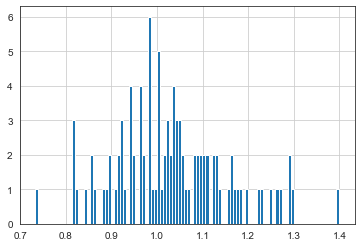

In [143]:
df_turnover_all['win_loss_ratio_past'].hist(bins = 100)

In [144]:
turnover_balance = df_turnover_all['team'].where((df_turnover_all['win_loss_ratio_past'] > 0.9) & (df_turnover_all['win_loss_ratio_past'] < 1.1)).dropna().to_list()

## Strategy: Random picks

#### Reversion

In [145]:
s['result_ha_hdc'].value_counts()

0.0    22511
1.0    22511
Name: result_ha_hdc, dtype: int64

In [147]:
df_turnover_ret = pd.DataFrame()
rand_match = []
win_loss_balance = []
for team in turnover_balance:
    s_team = s.loc[s['Team'] == team].dropna()
#     for i in range(100):
    s_team['return_hdc'] = np.NaN

    rand_pick = 'rand_pick' + str(i)
    
    s_team[rand_pick] = np.random.randint(0, 2, s_team.shape[0])

    # create a mask
    mask = (s_team['result_ha_hdc'] != s_team[rand_pick])
    rand_match.append(mask.mean())

    # get the cumsum from the mask
    s_team['R'] = mask.cumsum() - mask.cumsum().where(~mask).ffill().fillna(0)
    
    # use np.where to create the output
    s_team['return_hdc'] = np.where(s_team['R'] == 0, (2**(s_team['R'].shift(1) + 1))/2, -(2**s_team['R'])/2)
    s_team['return_hdc'].iloc[0] = np.where(s_team['R'].iloc[0] == 0, 1, np.where(s_team['R'].iloc[0] == 1, -1, np.NaN))
    
    s_team.loc[s_team['return_hdc'] > 0, 'return_hdc'] = s_team['return_hdc']*s_team['rate_hdc']
    
    balance_tmp = s_team.loc[s_team['return_hdc'] > 0, 'return_hdc'].sum() + s_team.loc[s_team['return_hdc'] < 0, 'return_hdc'].sum()
    win_loss_balance.append(balance_tmp)
    
    df_tmp = pd.DataFrame()
    df_tmp.loc[:,team] = s_team['return_hdc']
    df_tmp = df_tmp.reset_index(drop = True)
    df_turnover_ret = pd.concat([df_turnover_ret, df_tmp], ignore_index = True, axis = 1)

df_turnover_ret = df_turnover_ret.fillna(0)


C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


#### Momentum

In [442]:
threshold = 3
ret_sum_rd=[]
for team in turnover_balance:
    s_team = s.loc[s['Team'] == team].dropna()
    df_rd = s_team[['Date','result_ha_hdc']]
    df_rd['rand_pick'] = np.random.randint(0, 2, df_rd.shape[0])
    df_rd['mask'] = df_rd['result_ha_hdc'] == df_rd['rand_pick']
    df_rd['R'] = df_rd['mask'].cumsum() - df_rd['mask'].cumsum().where(~df_rd['mask']).ffill().fillna(0)
    df_rd['mask'] = df_rd['mask']*1
    df_rd['strat'] = np.where(df_rd['mask'] == 0, np.NaN, df_rd['R'])

    df_rd['ret'] = np.where( df_rd['strat'] % threshold != 0, 2**((df_rd['strat'] % threshold) - 1), 2**(threshold-1))
    df_rd.loc[ df_rd['R'] == 0, 'ret'  ] = -1
    df_rd.loc[ (df_rd['R'] == 0) & (0 < df_rd['R'].shift()) & (df_rd['R'].shift() < threshold), 'ret'  ] = -2**(df_rd['ret'].shift())
    
#     ret_sum_tmp = df_rd['ret'].sum()
    ret_sum_tmp = df_rd['ret'].where(df_rd['ret'] > 0).sum()*0.85 + df_rd['ret'].where(df_rd['ret'] < 0).sum()
    ret_sum_rd.append(ret_sum_tmp)

    

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

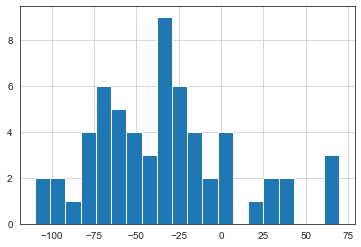

In [443]:
pd.Series(ret_sum_rd).hist(bins = 20)

In [444]:
pd.Series(ret_sum_rd).describe()

count     60.000000
mean     -33.130000
std       41.303001
min     -109.750000
25%      -64.200000
50%      -32.825000
75%      -15.362500
max       69.850000
dtype: float64

In [445]:
pd.Series(ret_sum_rd).sum()

-1987.8000000000006

In [ ]:
#CHECK THE RANDOM FUNCTION

In [ ]:
pd.Series(win_loss_balance).hist(bins = 50)

In [ ]:
pd.Series(rand_match).describe()

In [ ]:
df_turnover_ret.sum(axis = 1).describe()

In [ ]:
df_turnover_ret.sum(axis = 1).cumsum().describe()

In [ ]:
arr_cum_tmp =  df_turnover_ret.sum(axis = 1).cumsum().describe()

In [ ]:
arr_cum_tmp

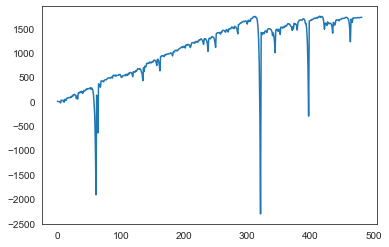

In [148]:
plt_cum_tmp = df_turnover_ret.sum(axis = 1).cumsum().plot()

# Strategies - History

### Linear

In [ ]:
team_strat_list = []
bid_strat_list = []
ret_strat_list = []
ret_max = []
ret_min = []
ret_strat_hedge_list = []
ret_max_hedge = []
ret_min_hedge = []
threshold = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

for team in s['Team'].unique():
    odd = s['odd'].loc[s['Team'] == team]
    win = s['win'].loc[s['Team'] == team]
    draw = s['draw'].loc[s['Team'] == team]
    loss = s['loss'].loc[s['Team'] == team]
    result_match = s['result_match'].loc[s['Team'] == team]
    
    s_current_bm = s['result_ha_hdc'].loc[s['Team'] == team]
    s_current_bm_shift = s['result_ha_hdc'].loc[s['Team'] == team].shift(1)
    s_current_bm_mask = s_current_bm == s_current_bm_shift
    s_current_bm_cs = s_current_bm_mask.cumsum() - s_current_bm_mask.cumsum().where(~s_current_bm_mask).ffill().fillna(0)
    
    df_bm = pd.DataFrame({'result_match' : result_match, 'odd' : odd, 'win' : win, 'draw' : draw, 'loss' : loss, 'current' : s_current_bm, 
                          'current_shift' : s_current_bm_shift, 'mask' : s_current_bm_mask, 'cs' : s_current_bm_cs})
    
    df_bm['cs_shift'] = pd.Series((df_bm['cs'] == 0) & (df_bm['cs'].shift(1) > 0))*1
    df_bm['cs_shift'] = df_bm['cs_shift'].astype(int)

    df_bm['strat'] = np.NaN
    df_bm.loc[(df_bm['cs'] > threshold[1]) & pd.notna(df_bm['current'].shift(-1)), 'strat'] = 1 # bid after threshold n + 1 consecutive results
    df_bm.loc[(df_bm['cs_shift'] == 1) & (df_bm['cs'].shift(1) > threshold[1]), 'strat'] = 0 # value set equal to the previous line
    df_bm.loc[pd.isna(df_bm['current']), 'strat'] = np.NaN

    df_bm['strat_exec'] = df_bm['strat'].shift(1)
    df_bm['strat_mask'] = df_bm['strat'] == df_bm['strat_exec']
    df_bm['strat_cs'] = df_bm['strat_mask'].cumsum() - df_bm['strat_mask'].cumsum().where(~df_bm['strat_mask']).ffill().fillna(0) 
    df_bm.loc[df_bm['strat_cs'] > 0, 'strat'] = df_bm['strat'] + df_bm['strat_cs']

    df_bm['return'] = np.where( df_bm['strat'] == 0, 2, np.where(df_bm['strat'] > 0, -2, np.NaN))
    df_bm['return'] = df_bm['return'] / 2
    
    df_bm['hedge_win'] = np.where(df_bm['odd'] < 0, 0.2*df_bm['win'], 0)
    df_bm['hedge_loss'] = np.where(df_bm['odd'] > 0, 0.2*df_bm['loss'], 0)
    
    df_bm['return_hedge'] = np.where( df_bm['result_match'] == 1, df_bm['return'] + df_bm['hedge_win'] - df_bm['hedge_loss'],
                                    np.where(df_bm['result_match'] == 0, df_bm['return'] + df_bm['hedge_loss'] - df_bm['hedge_win'], df_bm['return'] - df_bm['hedge_loss'] - df_bm['hedge_win']))
    
    team_tmp = team
    team_strat_list.append(team_tmp)

    bid_strat_tmp = df_bm['return'].count()
    bid_strat_list.append(bid_strat_tmp)
    
    ret_strat_tmp = df_bm['return'].sum()
    ret_strat_list.append(ret_strat_tmp)
    
    ret_max_tmp = df_bm['return'].max()
    ret_max.append(ret_max_tmp)

    ret_min_tmp = df_bm['return'].min()
    ret_min.append(ret_min_tmp)

    ret_strat_hedge_tmp = df_bm['return_hedge'].sum()
    ret_strat_hedge_list.append(ret_strat_hedge_tmp)
    
    ret_max_hedge_tmp = df_bm['return_hedge'].max()
    ret_max_hedge.append(ret_max_hedge_tmp)

    ret_min_hedge_tmp = df_bm['return_hedge'].min()
    ret_min_hedge.append(ret_min_hedge_tmp)

df_ret_linear = pd.DataFrame({'team' : team_strat_list, 'bid' : bid_strat_list, 
                              'ret' : ret_strat_list, 'ret_max' : ret_max, 'ret_min' : ret_min,
                             'ret_hedge' : ret_strat_hedge_list, 'ret_max_hedge' : ret_max_hedge, 'red_min_hedge' : ret_min_hedge})

In [ ]:
##### Review: Should pick Odd = 0?  #####
#########################################
df_ret_linear

In [ ]:
df_ret_linear['ret'].sum()

In [ ]:
df_ret_linear['ret_hedge'].sum()

In [ ]:
df_ret_linear['bid'].sum()

In [ ]:
# Try trading momentum: If loss, bid against. If win, bid for.
# If lose: continue momentum
# If win: stop or continue?
# Hypothesis: Linear - Momentum ; Exponential - Reversion
# Try hedge the trade, either momentum, reversion or both

### Exponential

#### Reversion

In [ ]:
team_strat_list = []
bid_strat_list = []
ret_strat_list = []
ret_max = []
ret_min = []
for threshold in [6, 7, 8]: # [2, 3, 4, 5, 6, 7, 8, 9]:

    for team in s['Team'].unique():
        s_current_bm = s['result_ha_hdc'].loc[s['Team'] == team]
        s_current_bm_shift = s['result_ha_hdc'].loc[s['Team'] == team].shift(1)
        s_current_bm_mask = s_current_bm == s_current_bm_shift
        s_current_bm_cs = s_current_bm_mask.cumsum() - s_current_bm_mask.cumsum().where(~s_current_bm_mask).ffill().fillna(0)
        df_bm = pd.DataFrame({'current' : s_current_bm, 'current_shift' : s_current_bm_shift, 'mask' : s_current_bm_mask, 
                             'cs' : s_current_bm_cs})
        df_bm['cs_shift'] = pd.Series((df_bm['cs'] == 0) & (df_bm['cs'].shift(1) > 0))*1
        df_bm['cs_shift'] = df_bm['cs_shift'].astype(int)

        df_bm['strat'] = np.NaN
        df_bm.loc[(df_bm['cs'] > threshold) & pd.notna(df_bm['current'].shift(-1)), 'strat'] = 1 # bid after threshold n + 1 consecutive results (here n = 2)
        df_bm.loc[(df_bm['cs_shift'] == 1) & (df_bm['cs'].shift(1) > threshold), 'strat'] = 0 # value set equal to the previous line (here 2)
        df_bm.loc[pd.isna(df_bm['current']), 'strat'] = np.NaN

        df_bm['strat_exec'] = df_bm['strat'].shift(1)
        df_bm['strat_mask'] = df_bm['strat'] == df_bm['strat_exec']
        df_bm['strat_cs'] = df_bm['strat_mask'].cumsum() - df_bm['strat_mask'].cumsum().where(~df_bm['strat_mask']).ffill().fillna(0) 
        df_bm.loc[df_bm['strat_cs'] > 0, 'strat'] = df_bm['strat'] + df_bm['strat_cs']

        df_bm['return'] = np.where( df_bm['strat'] == 0, 2**(df_bm['strat'].shift(1) + 1), -2**df_bm['strat'])
        df_bm['return'] = df_bm['return'] / 2

        team_strat_list.append(team)

        bid_strat_tmp = df_bm['return'].count()
        bid_strat_list.append(bid_strat_tmp)

        ret_strat_tmp = df_bm['return'].sum()
        ret_strat_list.append(ret_strat_tmp)

        ret_max_tmp = df_bm['return'].max()
        ret_max.append(ret_max_tmp)

        ret_min_tmp = df_bm['return'].min()
        ret_min.append(ret_min_tmp)

    df_ret_exp = pd.DataFrame({'team' : team_strat_list, 'bid' : bid_strat_list, 'ret' : ret_strat_list, 'ret_max' : ret_max, 'ret_min' : ret_min})

In [ ]:
df_ret_exp

In [ ]:
df_ret_exp['bid'].sum()

In [ ]:
df_ret_exp['ret'].sum()

In [ ]:
df_ret_exp['ret_max'].mean()

In [ ]:
df_ret_exp['ret_min'].mean()

In [ ]:
df_ret_exp['ret_min'].min()

In [ ]:
df_ret_exp['ret_min'].describe()

In [ ]:
df_ret_exp.loc[df_ret_exp['bid'] != 0]['ret_min'].hist(bins = 100)

#### Momentum

In [ ]:
bid_strat_thresh_h_m = []
ret_strat_thresh_h_m = []
ret_max_thresh_h_m = []
ret_min_thresh_h_m = []
ret_turnover_thresh_h_m = []

In [ ]:
for threshold in list(range(2, 10)):
    team_strat_list_h_m = []
    bid_strat_list_h_m = []
    ret_strat_list_h_m = []
    ret_max_h_m = []
    ret_min_h_m = []
    ret_turnover_h_m = []
    # for team in ['Bologna']:
    for team in s['Team'].unique():
        s_current_bm = s['result_ha_hdc'].loc[s['Team'] == team] #.dropna()
        s_current_bm_shift = s_current_bm.shift(1)
        s_current_bm_mask = s_current_bm == s_current_bm_shift
        s_current_bm_cs = s_current_bm_mask.cumsum() - s_current_bm_mask.cumsum().where(~s_current_bm_mask).ffill().fillna(0) + 1

        list_1 = np.asarray(s_current_bm_cs.to_list())
        list_1_rep = np.asarray(s_current_bm_cs.to_list())
        modified_list_1 = np.append(list_1,1) # to always have a "next 1"

        idx_of_4 = np.where(modified_list_1==threshold)[0]
        idx_of_1 = np.where(modified_list_1==1)[0]
        idx_of_1_app = np.append(idx_of_1, idx_of_1[-1] + 1)

        idx_of_4_followed_by_1 = np.intersect1d(idx_of_4, idx_of_1_app-1)
        arr_slice_idx = [(start, np.min(idx_of_1_app[idx_of_1_app>(start+1)])) for start in idx_of_4_followed_by_1]

        for start,end in arr_slice_idx:
            list_1[start+1:end+1] = 0

        list_2 = pd.Series([np.NaN if x != 0 else 1 for x in list_1])
        list_2_shift = list_2.shift(1)
        list_2_mask = list_2 == list_2_shift
        list_2_cs = list_2_mask.cumsum() - list_2_mask.cumsum().where(~list_2_mask).ffill().fillna(0) + 1

        df_c_m = pd.DataFrame({'current' : s_current_bm.to_list(), 'cumsum' : s_current_bm_cs.to_list(), 'strat_mo' : list_2.to_list(), 'strat_mo_cum' : list_2_cs.to_list()})
        df_c_m['cumsum_shift'] = df_c_m['cumsum'].shift(-1)
        df_c_m['cumsum_mask'] = df_c_m['cumsum'] < df_c_m['cumsum_shift']

        df_c_m['strat'] = np.NaN
        df_c_m.loc[(df_c_m['cumsum'] == threshold) & df_c_m['cumsum_mask'], 'strat'] = 1
        df_c_m['strat'] = df_c_m['strat'].shift(1)

        df_c_m['strat_mo_filter'] = np.NaN
        df_c_m.loc[df_c_m['strat_mo'].notnull() & df_c_m['strat_mo_cum'].notnull(), 'strat_mo_filter'] = df_c_m['strat_mo_cum']
        strat_mo_filter = df_c_m['strat_mo_filter']
        strat_mo_filter[~np.isnan(strat_mo_filter) & ~np.isnan(np.r_[strat_mo_filter[1:],np.nan])] = strat_mo_filter*-1

        df_c_m['return'] = np.where( df_c_m['strat'] == 0, 2**(df_c_m['strat'].shift(1) + 1), -2**df_c_m['strat'])

        df_c_m['strat_final'] = np.NaN
        df_c_m['strat_final'] = df_c_m['strat_final'].fillna(df_c_m['strat_mo_filter']).fillna(df_c_m['strat'])
        df_c_m['return'] = np.where(df_c_m['strat_final'] > 0, 2**(df_c_m['strat_final']), -2**(-df_c_m['strat_final']))
        df_c_m['return'] = df_c_m['return'] / 2

    #     df_c_m.loc[abs(df_c_m['return']) > 32, 'return'] = np.NaN

        team_strat_list_h_m.append(team)

        bid_strat_tmp = df_c_m['return'].count()
        bid_strat_list_h_m.append(bid_strat_tmp)

        ret_strat_tmp = df_c_m['return'].sum()
        ret_strat_list_h_m.append(ret_strat_tmp)

        ret_max_tmp = df_c_m['return'].max()
        ret_max_h_m.append(ret_max_tmp)

        ret_min_tmp = df_c_m['return'].min()
        ret_min_h_m.append(ret_min_tmp)

        ret_turnover_tmp = df_c_m['return'].where(df_c_m['return'] < 0).count()
        ret_turnover_h_m.append(ret_turnover_tmp)

    bid_strat_thresh_h_m.append(bid_strat_list_h_m)
    ret_strat_thresh_h_m.append(ret_strat_list_h_m)
    ret_max_thresh_h_m.append(ret_max_h_m)
    ret_min_thresh_h_m.append(ret_min_h_m)
    ret_turnover_thresh_h_m.append(ret_turnover_h_m)

# df_ret_c_m = pd.DataFrame({'team' : team_strat_list_c_m, 'bid' : bid_strat_list_c_m, 'ret' : ret_strat_list_c_m, 'ret_max' : ret_max_c_m, 'ret_min' : ret_min_c_m})

In [ ]:
bid_mean_h_m = []
bid_sum_h_m = []
ret_sum_h_m = []
ret_max_mean_h_m = []
ret_min_mean_h_m = []
ret_min_min_h_m = []

ret_min_h_8 = []
ret_min_h_16 = []
ret_min_h_32 = []
ret_min_h_64 = []
ret_min_h_128 = []
ret_turnover_mean_h_m = []

for i in range(0, 8):
    bid_tmp = pd.Series(bid_strat_thresh_h_m[i]).mean()
    bid_sum_tmp = pd.Series(bid_strat_thresh_h_m[i]).sum()
    ret_tmp = pd.Series(ret_strat_thresh_h_m[i]).sum()
    ret_max_tmp = pd.Series(ret_max_thresh_h_m[i]).mean()
    ret_min_tmp = pd.Series(ret_min_thresh_h_m[i]).mean()
    ret_min_min_tmp = pd.Series(ret_min_thresh_h_m[i]).min()
    ret_turnover_tmp =pd.Series(ret_turnover_thresh_h_m[i]).mean()
    
    ret_min_h_8_tmp = pd.Series(ret_min_thresh_h_m[i]).where(pd.Series(ret_min_thresh_h_m[i]) == -8).value_counts().values
    ret_min_h_16_tmp = pd.Series(ret_min_thresh_h_m[i]).where(pd.Series(ret_min_thresh_h_m[i]) == -16).value_counts().values
    ret_min_h_32_tmp = pd.Series(ret_min_thresh_h_m[i]).where(pd.Series(ret_min_thresh_h_m[i]) == -32).value_counts().values
    ret_min_h_64_tmp = pd.Series(ret_min_thresh_h_m[i]).where(pd.Series(ret_min_thresh_h_m[i]) == -64).value_counts().values
    ret_min_h_128_tmp = pd.Series(ret_min_thresh_h_m[i]).where(pd.Series(ret_min_thresh_h_m[i]) == -128).value_counts().values
    
    bid_mean_h_m.append(bid_tmp)
    bid_sum_h_m.append(bid_sum_tmp)
    ret_sum_h_m.append(ret_tmp)
    ret_max_mean_h_m.append(ret_max_tmp)
    ret_min_mean_h_m.append(ret_min_tmp)
    ret_min_min_h_m.append(ret_min_min_tmp)
    ret_turnover_mean_h_m.append(ret_turnover_tmp)
    
    ret_min_h_8.append(ret_min_h_8_tmp)
    ret_min_h_16.append(ret_min_h_16_tmp)
    ret_min_h_32.append(ret_min_h_32_tmp)
    ret_min_h_64.append(ret_min_h_64_tmp)
    ret_min_h_128.append(ret_min_h_128_tmp)

In [ ]:
df_summary_h = pd.DataFrame({'threshold' : range(2, 10) ,'bid_mean' : bid_mean_h_m, 'bid_sum' : bid_sum_h_m, 'ret_sum' : ret_sum_h_m, 'ret_max_mean' : ret_max_mean_h_m,
                          'ret_min_mean' : ret_min_mean_h_m, 'ret_min_min' : ret_min_min_h_m, 'ret_turnover_mean' : ret_turnover_mean_h_m,
                          'ret_min_8' : ret_min_h_8, 'ret_min_16' : ret_min_h_16, 'ret_min_32' : ret_min_h_32,
                          'ret_min_64' : ret_min_h_64, 'ret_min_128' : ret_min_h_128})

In [ ]:
df_summary_h

# Strategies - Current (Exponential)

### Reversion

In [611]:
bid_strat_thresh_c_r = []
ret_strat_thresh_c_r = []
ret_max_thresh_c_r = []
ret_min_thresh_c_r = []
ret_turnover_thresh_c_r = []

ret_cum_c_r = []
plt_cum_c_r = []
ret_cum_c_r_list = []

In [610]:
season_date_begin = ['2005-04-01', '2006-04-01', '2007-04-01', '2008-04-01', '2010-04-01', '2011-04-01', '2012-04-01', '2013-04-01', '2014-04-01', '2015-04-01', '2016-04-01', '2017-04-01', '2018-04-01', '2019-04-01']
season_date_end   = ['2006-06-30', '2007-06-30', '2008-06-30', '2009-06-30', '2011-06-30', '2012-06-30', '2013-06-30', '2014-06-30', '2015-06-30', '2016-06-30', '2017-06-30', '2018-06-30', '2019-06-30', '2020-06-30']


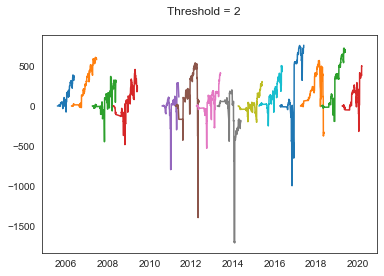

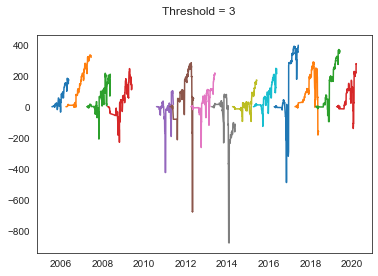

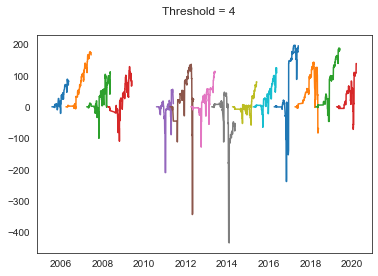

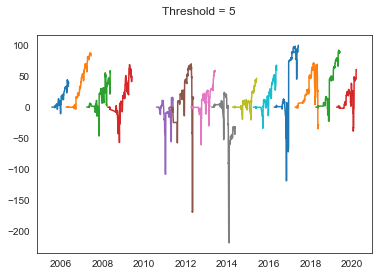

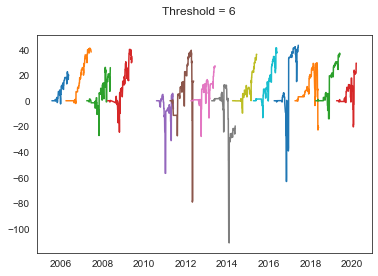

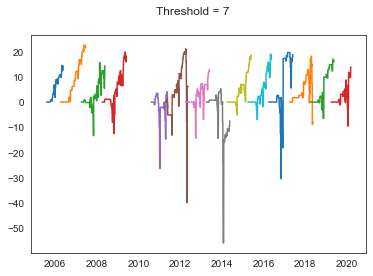

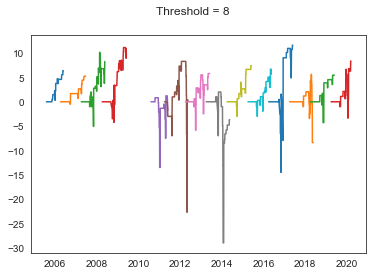

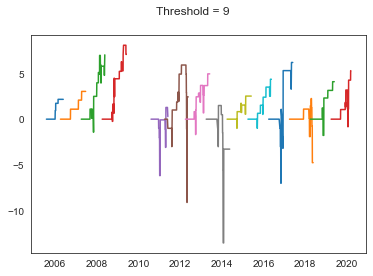

In [612]:

# for threshold in [5, 6]:
for threshold in list(range(2, 10)):
    team_strat_list_c_r = []
    bid_strat_list_c_r = []
    ret_strat_list_c_r = []
    ret_max_c_r = []
    ret_min_c_r = []
    ret_turnover_c_r = []
#     df_ret_cum = pd.DataFrame({'Date' : df_all.index}).drop_duplicates().sort_values(by='Date')
    plt.figure()

    for season_ind in [7]: # list(range(0, len(season_date_begin))):
        df_ret_cum = pd.DataFrame({'Date' : df_all[season_date_begin[season_ind] : season_date_end[season_ind]].index}).drop_duplicates().sort_values(by='Date')
        
        s_season = s.set_index('Date')[season_date_begin[season_ind] : season_date_end[season_ind]].reset_index()

    
        for team in s_season['Team'].unique():
            df_s_c_r = s_season.loc[s_season['Team'] == team]
            df_s_c_r = df_s_c_r[['Date','result_ha_hdc', 'rate_hdc', 'ret_rate_hdc']] #.set_index('Date')
            df_s_c_r = df_s_c_r.rename(columns = {'result_ha_hdc' : 'current'})

            df_c_r = df_s_c_r.dropna()
            df_c_r['current_shift'] = df_c_r['current'].shift(1)
            df_c_r['mask'] = df_c_r['current'] == df_c_r['current_shift']
            df_c_r['cs'] = df_c_r['mask'].cumsum() - df_c_r['mask'].cumsum().where(~df_c_r['mask']).ffill().fillna(0) + 1

            df_c_r['cs_shift'] = pd.Series((df_c_r['cs'] == 0) & (df_c_r['cs'].shift(1) > 0))*1
            df_c_r['cs_shift'] = df_c_r['cs_shift'].astype(int)

            df_c_r['strat'] = np.NaN
            df_c_r.loc[(df_c_r['cs'] > threshold) & pd.notna(df_c_r['current'].shift(-1)), 'strat'] = (df_c_r['cs'] - threshold) # bid after threshold n
            if df_c_r['cs'].iloc[[-1]].values[0] > threshold:
                df_c_r['strat'].iloc[[-1]] = df_c_r['cs'].iloc[[-1]] - threshold
            df_c_r.loc[(df_c_r['cs'] == 1) & (df_c_r['cs'].shift(1) >= threshold), 'strat'] = 0

            df_c_r['return'] = np.where((df_c_r['strat'] == 0) & (pd.notna(df_c_r['strat'].shift(1))), 2**(df_c_r['strat'].shift(1) + 1), 
                                       np.where((df_c_r['strat'] == 0) & (pd.isna(df_c_r['strat'].shift(1))), 2, -2**df_c_r['strat']))
            df_c_r['return'] = df_c_r['return'] / 2
            df_c_r.loc[df_c_r['return'] > 0, 'return'] = df_c_r['return'] * df_c_r['rate_hdc'] 
            df_c_r['return'] = df_c_r['return']* df_c_r['ret_rate_hdc']

            team_strat_list_c_r.append(team)

            bid_strat_tmp = df_c_r['return'].count()
            bid_strat_list_c_r.append(bid_strat_tmp)

            ret_strat_tmp = df_c_r['return'].sum()
            ret_strat_list_c_r.append(ret_strat_tmp)

            ret_max_tmp = df_c_r['return'].max()
            ret_max_c_r.append(ret_max_tmp)

            ret_min_tmp = df_c_r['return'].min()
            ret_min_c_r.append(ret_min_tmp)

            if pd.notna(df_c_r['return']).sum() == 0:
                ret_turnover_tmp = np.NaN
            else:
                ret_turnover_tmp = df_c_r['return'].where(df_c_r['return'] < 0).count()
            ret_turnover_c_r.append(ret_turnover_tmp)

            df_ret_cum_tmp = df_s_c_r.merge(df_c_r, on = 'Date', how = 'left')
            df_ret_cum_tmp = df_ret_cum_tmp.rename(columns = {'return': team})
            df_ret_cum_tmp = df_ret_cum_tmp[['Date', team]].sort_values(by = 'Date')

            df_ret_cum = df_ret_cum.merge(df_ret_cum_tmp, on = 'Date', how = 'left')

        bid_strat_thresh_c_r.append(bid_strat_list_c_r)
        ret_strat_thresh_c_r.append(ret_strat_list_c_r)
        ret_max_thresh_c_r.append(ret_max_c_r)
        ret_min_thresh_c_r.append(ret_min_c_r)
        ret_turnover_thresh_c_r.append(ret_turnover_c_r)

        df_ret_cum = df_ret_cum.set_index('Date') #.fillna(0)

        ret_cum_c_r_tmp = df_ret_cum.sum(axis = 1).cumsum().describe()
        ret_cum_c_r.append(ret_cum_c_r_tmp)
        ret_cum_c_r_l_tmp = df_ret_cum.sum(axis = 1).cumsum()
        ret_cum_c_r_list.append(ret_cum_c_r_l_tmp)

        plt.plot(df_ret_cum.sum(axis=1).cumsum()) #, title = 'threshold = {}'.format(threshold)) #, figsize=(20,5),grid=True)
        plt.suptitle('Threshold = {}'.format(threshold))

        df_ret_c_r = pd.DataFrame({'team' : team_strat_list_c_r, 'bid' : bid_strat_list_c_r, 'ret' : ret_strat_list_c_r, 'ret_max' : ret_max_c_r, 'ret_min' : ret_min_c_r})

In [490]:
# df_ret_cum.to_csv(root_dir + '//ret_cum_r_th_5.csv')
# s.to_csv(root_dir + '//stack_all.csv')

In [488]:
# for thrh in [2]: 
for thrh in list(range(2, 10)):
    print('Bid after {} matches, total bids = {}, mean = {}, min = {}, max = {}'.format(str(thrh), pd.Series(bid_strat_thresh_c_r[thrh - 2]).sum(),
                                                                             ret_cum_c_r[thrh - 2]['mean'], ret_cum_c_r[thrh - 2]['min'], 
                                                                             ret_cum_c_r[thrh - 2]['max']))

Bid after 2 matches, total bids = 22237, mean = 2862.748329741382, min = -76.32000000000001, max = 6391.66
Bid after 3 matches, total bids = 10894, mean = 1477.6746012931014, min = -35.01000000000001, max = 3299.964999999999
Bid after 4 matches, total bids = 5294, mean = 753.158441810345, min = -21.250000000000007, max = 1677.0900000000013
Bid after 5 matches, total bids = 2563, mean = 380.98640948275835, min = -10.720000000000002, max = 841.4699999999999
Bid after 6 matches, total bids = 1242, mean = 199.70122198275863, min = -2.480000000000002, max = 425.63499999999937
Bid after 7 matches, total bids = 594, mean = 105.85817025862019, min = 0.0, max = 216.33999999999992
Bid after 8 matches, total bids = 280, mean = 44.687176724138226, min = 0.0, max = 93.39499999999995
Bid after 9 matches, total bids = 142, mean = 26.799359913793154, min = 0.0, max = 54.76999999999998


In [ ]:
bid_mean_c_r = []
bid_sum_c_r = []
ret_sum_c_r = []
ret_max_mean_c_r = []
ret_min_mean_c_r = []
ret_min_min_c_r = []
ret_turnover_mean_c_r = []

ret_min_c_r_8 = []
ret_min_c_r_16 = []
ret_min_c_r_32 = []
ret_min_c_r_64 = []
ret_min_c_r_128 = []

for i in range(0, 8):
    bid_tmp = pd.Series(bid_strat_thresh_c_r[i]).mean()
    bid_sum_tmp = pd.Series(bid_strat_thresh_c_r[i]).sum()
    ret_tmp = pd.Series(ret_strat_thresh_c_r[i]).sum()
    ret_max_tmp = pd.Series(ret_max_thresh_c_r[i]).mean()
    ret_min_tmp = pd.Series(ret_min_thresh_c_r[i]).mean()
    ret_min_min_tmp = pd.Series(ret_min_thresh_c_r[i]).min()
    ret_turnover_tmp =pd.Series(ret_turnover_thresh_c_r[i]).mean() 
    
    ret_min_8_tmp = pd.Series(ret_min_thresh_c_r[i]).where(pd.Series(ret_min_thresh_c_r[i]) == -8).value_counts().values
    ret_min_16_tmp = pd.Series(ret_min_thresh_c_r[i]).where(pd.Series(ret_min_thresh_c_r[i]) == -16).value_counts().values
    ret_min_32_tmp = pd.Series(ret_min_thresh_c_r[i]).where(pd.Series(ret_min_thresh_c_r[i]) == -32).value_counts().values
    ret_min_64_tmp = pd.Series(ret_min_thresh_c_r[i]).where(pd.Series(ret_min_thresh_c_r[i]) == -64).value_counts().values
    ret_min_128_tmp = pd.Series(ret_min_thresh_c_r[i]).where(pd.Series(ret_min_thresh_c_r[i]) == -128).value_counts().values
    
    bid_mean_c_r.append(bid_tmp)
    bid_sum_c_r.append(bid_sum_tmp)
    ret_sum_c_r.append(ret_tmp)
    ret_max_mean_c_r.append(ret_max_tmp)
    ret_min_mean_c_r.append(ret_min_tmp)
    ret_min_min_c_r.append(ret_min_min_tmp)
    ret_turnover_mean_c_r.append(ret_turnover_tmp)
    
    ret_min_c_r_8.append(ret_min_8_tmp)
    ret_min_c_r_16.append(ret_min_16_tmp)
    ret_min_c_r_32.append(ret_min_32_tmp)
    ret_min_c_r_64.append(ret_min_64_tmp)
    ret_min_c_r_128.append(ret_min_128_tmp)

In [ ]:
df_c_r_summary = pd.DataFrame({'threshold' : range(2, 10), 'bid_mean' : bid_mean_c_r, 'bid_sum' : bid_sum_c_r, 'ret_sum' : ret_sum_c_r, 'ret_max_mean' : ret_max_mean_c_r,
                          'ret_min_mean' : ret_min_mean_c_r, 'ret_min_min' : ret_min_min_c_r, 'ret_turnover_mean' : ret_turnover_mean_c_r,
                          'ret_min_8' : ret_min_c_r_8, 'ret_min_16' : ret_min_c_r_16, 'ret_min_32' : ret_min_c_r_32,
                          'ret_min_64' : ret_min_c_r_64, 'ret_min_128' : ret_min_c_r_128})

In [ ]:
# History
df_c_r_summary

In [650]:
df_all['scores'] = df_all['FTHG'].astype(int).astype(str) + '-' + df_all['FTAG'].astype(int).astype(str)

In [656]:
df_all['scores_total'] = df_all['FTHG'].astype(int) + df_all['FTAG'].astype(int)

In [658]:
s_scores = (df_all.filter(like = 'Team').stack()
         .reset_index(level=-1, drop=True)
         .reset_index(name='Team'))

In [660]:
s_scores.loc[::2, 'scores_total'] = df_all.scores_total.values
s_scores.loc[1::2,'scores_total'] = df_all.scores_total.values


In [ ]:
# s_scores.loc[s_scores['Team']=='Bayern Munich']['scores_total'].value_counts()

In [665]:
top_list = ['Bayern Munich', 'Dortmund', 'Man United', 'Man City', 'Chelsea', 'Liverpool', 'Tottenham', 'Barcelona', 'Real Madrid', 'Juventus']

In [1]:
for team in s_scores['Team'].unique:
    print('{} : {}'.format(team, str(s_scores.loc[s_scores['Team']==team]['scores_total'].mean())))
            

NameError: name 's_scores' is not defined

In [668]:
df_all['scores_total'].value_counts()

2     6158
3     5442
1     4396
4     3689
0     1977
5     1936
6      897
7      313
8      145
9       41
10      11
11       3
12       1
Name: scores_total, dtype: int64

### Momentum

In [ ]:
bid_strat_thresh_c_m = []
ret_strat_thresh_c_m = []
ret_max_thresh_c_m = []
ret_min_thresh_c_m = []
ret_turnover_thresh_c_m = []
ret_cum_c_m = []
plt_cum_c_m = []
ret_cum_c_m_list = []

In [ ]:
# for threshold in [3]:
for threshold in list(range(2, 10)):
    team_strat_list_c_m = []
    bid_strat_list_c_m = []
    ret_strat_list_c_m = []
    ret_max_c_m = []
    ret_min_c_m = []
    ret_turnover_c_m = []
    df_ret_cum = pd.DataFrame()

    for team in s['Team'].unique():
        s_c_m = s['result_ha_hdc'].loc[s['Team'] == team].dropna()
        s_c_m_shift = s_c_m.shift(1)
        s_c_m_mask = s_c_m == s_c_m_shift
        s_c_m_cs = s_c_m_mask.cumsum() - s_c_m_mask.cumsum().where(~s_c_m_mask).ffill().fillna(0) + 1

        list_1 = np.asarray(s_c_m_cs.to_list())
        list_1_rep = np.asarray(s_c_m_cs.to_list())
        modified_list_1 = np.append(list_1,1) # to always have a "next 1"

        idx_of_4 = np.where(modified_list_1==threshold)[0]
        
        idx_of_4_s = pd.Series(idx_of_4.copy())
        idx_of_4_s.loc[idx_of_4_s.groupby(idx_of_4_s.diff().ne(3).cumsum()).cumcount() % 2 == 1] = -1

        idx_of_4_new = [x for x in idx_of_4_s if x != -1]
        idx_of_1 = np.where(modified_list_1==1)[0]    
        idx_of_4_followed_by_1 = np.intersect1d(idx_of_4_new, idx_of_1 - 1)
        
        arr_slice_idx = []
        for start in idx_of_4_followed_by_1:
            if start < len(list_1_rep) - 1:
                arr_slice_tmp = (start, np.min(idx_of_1[idx_of_1>(start+1)]))
                arr_slice_idx.append(arr_slice_tmp)
            
        for start,end in arr_slice_idx:
            list_1[start+1:end+1] = 0
            
        list_2 = pd.Series([np.NaN if x != 0 else 1 for x in list_1])
        list_2_shift = list_2.shift(1)
        list_2_mask = list_2 == list_2_shift
        list_2_cs = list_2_mask.cumsum() - list_2_mask.cumsum().where(~list_2_mask).ffill().fillna(0) + 1

        df_c_m = pd.DataFrame({'current' : s_c_m.to_list(), 'cumsum' : s_c_m_cs.to_list(), 'strat_mo' : list_2.to_list(), 'strat_mo_cum' : list_2_cs.to_list()})
        df_c_m['cumsum_shift'] = df_c_m['cumsum'].shift(-1)
        df_c_m['cumsum_mask'] = df_c_m['cumsum'] < df_c_m['cumsum_shift']

        df_c_m['strat'] = np.NaN
        df_c_m.loc[(df_c_m['cumsum'] == threshold) & df_c_m['cumsum_mask'], 'strat'] = 1
        df_c_m['strat'] = df_c_m['strat'].shift(1)

        df_c_m['strat_mo_filter'] = np.NaN
        df_c_m.loc[df_c_m['strat_mo'].notnull() & df_c_m['strat_mo_cum'].notnull(), 'strat_mo_filter'] = df_c_m['strat_mo_cum']
        strat_mo_filter = df_c_m['strat_mo_filter']
        strat_mo_filter[~np.isnan(strat_mo_filter) & ~np.isnan(np.r_[strat_mo_filter[1:],np.nan])] = strat_mo_filter*-1

        df_c_m['return'] = np.where( df_c_m['strat'] == 0, 2**(df_c_m['strat'].shift(1) + 1), -2**df_c_m['strat'])

        df_c_m['strat_final'] = np.NaN
        df_c_m['strat_final'] = df_c_m['strat_final'].fillna(df_c_m['strat_mo_filter']).fillna(df_c_m['strat'])
        df_c_m['return'] = np.where(df_c_m['strat_final'] > 0, 2**(df_c_m['strat_final']), -2**(-df_c_m['strat_final']))
        df_c_m['return'] = df_c_m['return'] / 2

    #     df_c_m.loc[abs(df_c_m['return']) > 32, 'return'] = np.NaN

        team_strat_list_c_m.append(team)

        bid_strat_tmp = df_c_m['return'].count()
        bid_strat_list_c_m.append(bid_strat_tmp)

        ret_strat_tmp = df_c_m['return'].sum()
        ret_strat_list_c_m.append(ret_strat_tmp)

        ret_max_tmp = df_c_m['return'].max()
        ret_max_c_m.append(ret_max_tmp)

        ret_min_tmp = df_c_m['return'].min()
        ret_min_c_m.append(ret_min_tmp)

        if pd.notna(df_c_m['return']).sum() == 0:
            ret_turnover_tmp = np.NaN
        else:
            ret_turnover_tmp = df_c_m['return'].where(df_c_m['return'] < 0).count()
        ret_turnover_c_m.append(ret_turnover_tmp)
        
        df_ret_cum_tmp = pd.DataFrame()
        df_ret_cum_tmp.loc[:, team] = df_c_m['return']
        df_ret_cum_tmp = df_ret_cum_tmp.reset_index(drop = True)
        df_ret_cum = pd.concat([df_ret_cum, df_ret_cum_tmp], ignore_index = True, axis = 1)

    bid_strat_thresh_c_m.append(bid_strat_list_c_m)
    ret_strat_thresh_c_m.append(ret_strat_list_c_m)
    ret_max_thresh_c_m.append(ret_max_c_m)
    ret_min_thresh_c_m.append(ret_min_c_m)
    ret_turnover_thresh_c_m.append(ret_turnover_c_m)
    
    df_ret_cum = df_ret_cum.fillna(0)
    
    ret_cum_c_m_tmp = df_ret_cum.sum(axis = 1).cumsum().describe()
    ret_cum_c_m.append(ret_cum_c_m_tmp)
    ret_cum_c_m_l_tmp = df_ret_cum.sum(axis = 1).cumsum()
    ret_cum_c_m_list.append(ret_cum_c_m_l_tmp)
    
    plt_cum_c_r_tmp = df_ret_cum.sum(axis=1).cumsum().plot()
    plt_cum_c_r.append(plt_cum_c_r_tmp)

# df_ret_c_m = pd.DataFrame({'team' : team_strat_list_c_m, 'bid' : bid_strat_list_c_m, 'ret' : ret_strat_list_c_m, 'ret_max' : ret_max_c_m, 'ret_min' : ret_min_c_m})

In [ ]:
for thrh in list(range(2, 10)):
    print('Bid after {} matches, total bids = {}, mean = {}, min = {}, max = {}'.format(str(thrh), pd.Series(bid_strat_thresh_c_m[thrh - 2]).sum(),
                                                                             ret_cum_c_m[thrh - 2]['mean'], ret_cum_c_m[thrh - 2]['min'], 
                                                                             ret_cum_c_m[thrh - 2]['max']))

In [ ]:
# History
# Bid after 2 matches, total bids = 18390, mean = 5474.157676348547, min = -3508.0, max = 8920.0
# Bid after 3 matches, total bids = 10198, mean = 3007.246887966805, min = -5177.0, max = 4952.0
# Bid after 4 matches, total bids = 5187, mean = 1577.966804979253, min = -939.0, max = 2557.0
# Bid after 5 matches, total bids = 2589, mean = 785.7551867219917, min = -73.0, max = 1277.0
# Bid after 6 matches, total bids = 1284, mean = 392.35477178423236, min = -806.0, max = 635.0
# Bid after 7 matches, total bids = 652, mean = 192.69709543568464, min = -462.0, max = 310.0
# Bid after 8 matches, total bids = 266, mean = 84.16597510373444, min = -450.0, max = 137.0
# Bid after 9 matches, total bids = 148, mean = 47.518672199170126, min = -12.0, max = 77.0

In [ ]:
# Current
# Bid after 2 matches, total bids = 959, mean = 149.20689655172413, min = -225.0, max = 471.0
# Bid after 3 matches, total bids = 495, mean = 97.89655172413794, min = -112.0, max = 266.0
# Bid after 4 matches, total bids = 248, mean = 29.344827586206897, min = -51.0, max = 121.0
# Bid after 5 matches, total bids = 108, mean = 8.655172413793103, min = -54.0, max = 50.0
# Bid after 6 matches, total bids = 45, mean = 8.586206896551724, min = -8.0, max = 24.0
# Bid after 7 matches, total bids = 18, mean = 5.448275862068965, min = 0.0, max = 12.0
# Bid after 8 matches, total bids = 14, mean = 3.1724137931034484, min = -3.0, max = 8.0
# Bid after 9 matches, total bids = 6, mean = 1.9655172413793103, min = 0.0, max = 5.0

In [ ]:
bid_mean_c_m = []
bid_sum_c_m = []
ret_sum_c_m = []
ret_max_mean_c_m = []
ret_min_mean_c_m = []
ret_min_min_c_m = []
ret_turnover_mean_c_m = []

ret_min_8 = []
ret_min_16 = []
ret_min_32 = []
ret_min_64 = []
ret_min_128 = []

for i in range(0, 8):
    bid_tmp = pd.Series(bid_strat_thresh_c_m[i]).mean()
    bid_sum_tmp = pd.Series(bid_strat_thresh_c_m[i]).sum()
    ret_tmp = pd.Series(ret_strat_thresh_c_m[i]).sum()
    ret_max_tmp = pd.Series(ret_max_thresh_c_m[i]).mean()
    ret_min_tmp = pd.Series(ret_min_thresh_c_m[i]).mean()
    ret_min_min_tmp = pd.Series(ret_min_thresh_c_m[i]).min()
    ret_turnover_tmp =pd.Series(ret_turnover_thresh_c_m[i]).mean() 
    
    ret_min_8_tmp = pd.Series(ret_min_thresh_c_m[i]).where(pd.Series(ret_min_thresh_c_m[i]) == -8).value_counts().values
    ret_min_16_tmp = pd.Series(ret_min_thresh_c_m[i]).where(pd.Series(ret_min_thresh_c_m[i]) == -16).value_counts().values
    ret_min_32_tmp = pd.Series(ret_min_thresh_c_m[i]).where(pd.Series(ret_min_thresh_c_m[i]) == -32).value_counts().values
    ret_min_64_tmp = pd.Series(ret_min_thresh_c_m[i]).where(pd.Series(ret_min_thresh_c_m[i]) == -64).value_counts().values
    ret_min_128_tmp = pd.Series(ret_min_thresh_c_m[i]).where(pd.Series(ret_min_thresh_c_m[i]) == -128).value_counts().values
    
    bid_mean_c_m.append(bid_tmp)
    bid_sum_c_m.append(bid_sum_tmp)
    ret_sum_c_m.append(ret_tmp)
    ret_max_mean_c_m.append(ret_max_tmp)
    ret_min_mean_c_m.append(ret_min_tmp)
    ret_min_min_c_m.append(ret_min_min_tmp)
    ret_turnover_mean_c_m.append(ret_turnover_tmp)
    
    ret_min_8.append(ret_min_8_tmp)
    ret_min_16.append(ret_min_16_tmp)
    ret_min_32.append(ret_min_32_tmp)
    ret_min_64.append(ret_min_64_tmp)
    ret_min_128.append(ret_min_128_tmp)
    

In [ ]:
df_c_m_summary = pd.DataFrame({'threshold' : range(2, 10), 'bid_mean' : bid_mean_c_m, 'bid_sum' : bid_sum_c_m, 'ret_sum' : ret_sum_c_m, 'ret_max_mean' : ret_max_mean_c_m,
                          'ret_min_mean' : ret_min_mean_c_m, 'ret_min_min' : ret_min_min_c_m, 'ret_turnover_mean' : ret_turnover_mean_c_m,
                          'ret_min_8' : ret_min_8, 'ret_min_16' : ret_min_16, 'ret_min_32' : ret_min_32,
                          'ret_min_64' : ret_min_64, 'ret_min_128' : ret_min_128}) #'threshold' : range(2, 10), 

In [ ]:
#history
df_c_m_summary

In [ ]:
#current
df_c_m_summary

### Tailgate momentum

In [192]:
bid_strat_thresh_c_m = []
ret_strat_thresh_c_m = []
ret_max_thresh_c_m = []
ret_min_thresh_c_m = []
ret_turnover_thresh_c_m = []
ret_cum_c_m = []
plt_cum_c_m = []
ret_cum_c_m_list = []

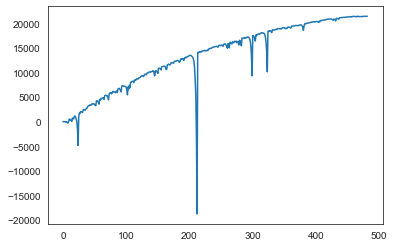

In [193]:
# for threshold in [3]:
# for threshold in list(range(2, 10)):
team_strat_list_c_m = []
bid_strat_list_c_m = []
ret_strat_list_c_m = []
ret_max_c_m = []
ret_min_c_m = []
ret_turnover_c_m = []
df_ret_cum = pd.DataFrame({'primer' : [np.NaN] * 500})

#     for team in ['Dortmund']: #Duisburg
for team in s['Team'].unique():
    s_c_m = s['result_ha_hdc'].loc[s['Team'] == team].dropna()
    s_c_m_t = s_c_m == s_c_m.shift()
    s_c_m_t = s_c_m_t[1:]
    # mark the blocks ending with True
    blocks = s_c_m_t.shift(fill_value=0).cumsum()
    # compute the positions within blocks and raise to power 2
    powers = 2**s_c_m_t.groupby(blocks).cumcount()
    #output:
    s_c_m_t_ret = np.where(s_c_m_t, 1,-1)*powers.values
    s_c_m_t_ret = np.append(0, s_c_m_t_ret)
#     df_c_m_t = pd.DataFrame({'current' : s_c_m.to_list(), 'shift' : s_c_m.shift().to_list(), 'return' : s_c_m_t_ret})

#     df_ret_cum_tmp = pd.DataFrame()
#     df_ret_cum_tmp.loc[:, team] = df_c_m_t['return']
#     df_ret_cum_tmp = df_ret_cum_tmp.reset_index(drop = True)
    df_ret_cum[team] = pd.Series(s_c_m_t_ret)
#     df_ret_cum[team] = df_ret_cum_tmp[team]

    team_strat_list_c_m.append(team)

    bid_strat_tmp = pd.Series(s_c_m_t_ret).count()
    bid_strat_list_c_m.append(bid_strat_tmp)

    ret_strat_tmp = pd.Series(s_c_m_t_ret).sum()
    ret_strat_list_c_m.append(ret_strat_tmp)

    ret_max_tmp = pd.Series(s_c_m_t_ret).max()
    ret_max_c_m.append(ret_max_tmp)

    ret_min_tmp = pd.Series(s_c_m_t_ret).min()
    ret_min_c_m.append(ret_min_tmp)

    if pd.notna(pd.Series(s_c_m_t_ret)).sum() == 0:
        ret_turnover_tmp = np.NaN
    else:
        ret_turnover_tmp = pd.Series(s_c_m_t_ret).where(pd.Series(s_c_m_t_ret) < 0).count()
    ret_turnover_c_m.append(ret_turnover_tmp)
  
    
bid_strat_thresh_c_m.append(bid_strat_list_c_m)
ret_strat_thresh_c_m.append(ret_strat_list_c_m)
ret_max_thresh_c_m.append(ret_max_c_m)
ret_min_thresh_c_m.append(ret_min_c_m)
ret_turnover_thresh_c_m.append(ret_turnover_c_m)

df_ret_cum = df_ret_cum.dropna(how = 'all').dropna(axis = 1, how = 'all')

ret_cum_c_m_tmp = df_ret_cum.sum(axis = 1).cumsum().describe()
ret_cum_c_m.append(ret_cum_c_m_tmp)
ret_cum_c_m_l_tmp = df_ret_cum.sum(axis = 1).cumsum()
ret_cum_c_m_list.append(ret_cum_c_m_l_tmp)

plt_cum_c_r_tmp = df_ret_cum.sum(axis=1).cumsum().plot()
plt_cum_c_r.append(plt_cum_c_r_tmp)

In [200]:
df_ret_cum.sum(axis=1).cumsum()

0          0.0
1         18.0
2          3.0
3        -15.0
4         12.0
        ...   
477    21434.0
478    21431.0
479    21425.0
480    21442.0
481    21439.0
Length: 482, dtype: float64

In [195]:
df_ret_cum[200:220].sum(axis = 1)

200       74.0
201       15.0
202       -2.0
203      -84.0
204     -167.0
205      -95.0
206     -292.0
207     -573.0
208    -1206.0
209    -2521.0
210    -2988.0
211    -8451.0
212   -15869.0
213    32850.0
214      -34.0
215       48.0
216      134.0
217      -87.0
218       72.0
219      -41.0
dtype: float64

In [ ]:
df_ret_cum.to_csv(root_dir + '//tailgate_momentum.csv')

In [ ]:
#Index = 4: Momentum after 6 matches

In [ ]:
# Add hedge
# Trade by team win/loss stride: Bid (reversion) after some win/loss stride, if that stride is greater than some value (for example)
# in the past, AND the value for longer stride is small enough.
